<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열분석 (Time Series)

* 시간 ! : 특정 간격 갖는 시간(Lag)
    - Lag 에서 Data의 Trend를 찾는다

* 일변량 정상시계열
    - ARIMA

* Trend : 추세
* Seasonality : 계절성
* Cycle : 주기
* Noise : 잡음 -> White Noise

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumBarunGothic')

In [94]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [95]:
df1 = pd.read_csv('/content/drive/MyDrive/python/데이터스테이션/data/Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [96]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [97]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [98]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [99]:
df1['Datetime'].describe()

<ipython-input-99-1eedf18d289e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [100]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

<ipython-input-100-093d56191f01>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week'] = df1['Datetime'].dt.week


In [101]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


<Axes: xlabel='Datetime', ylabel='구매금액'>

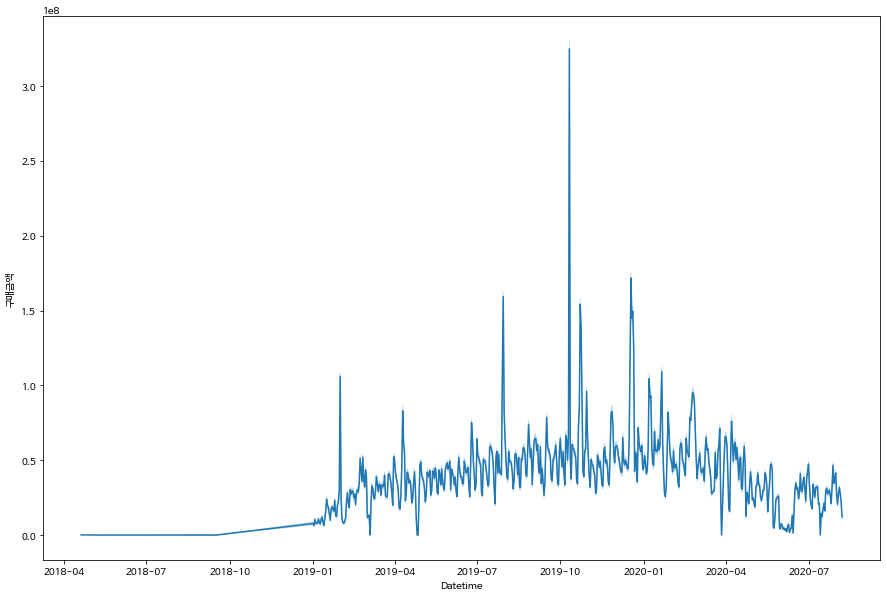

In [102]:
sns.lineplot(data=df1, x='Datetime',y='구매금액',estimator=sum)

In [103]:
p1 = pd.pivot_table(data=df1, index='Datetime',values='구매금액',aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

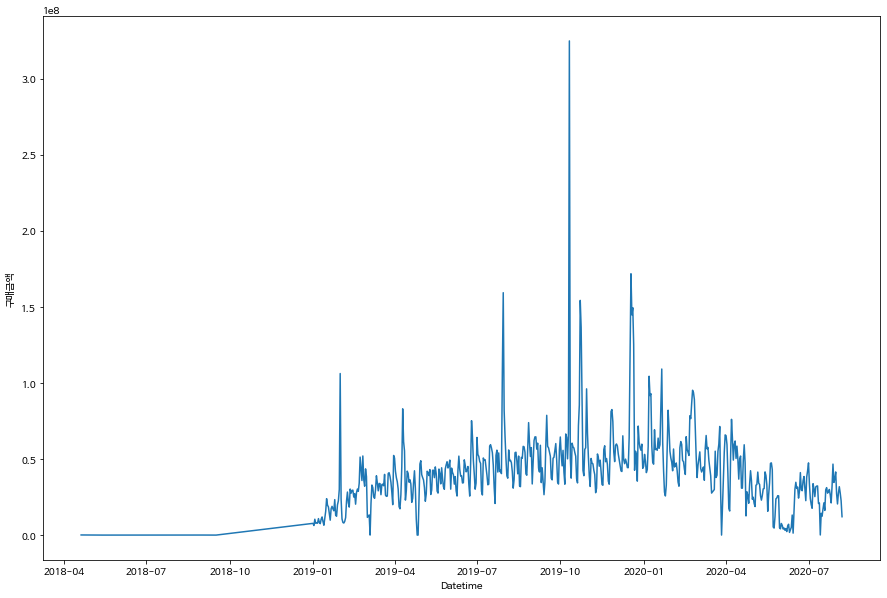

In [104]:
sns.lineplot(data=p1, x='Datetime',y='구매금액')

In [105]:
p2 = pd.pivot_table(data=df1, index=['Datetime','물품대분류'],values='구매금액',aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

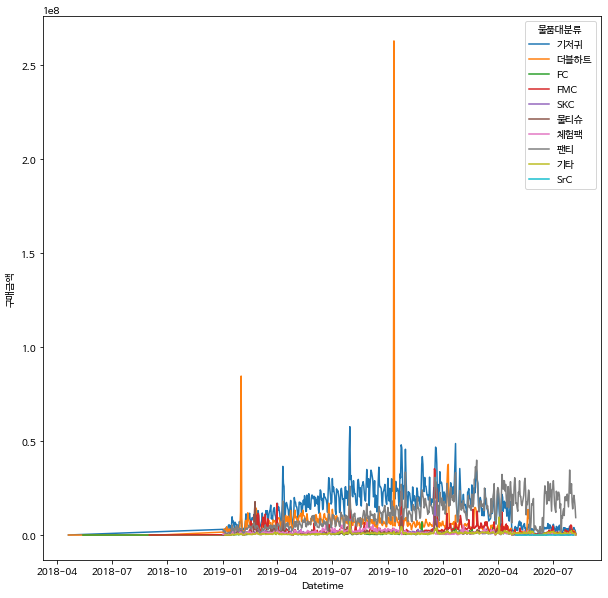

In [106]:
plt.figure(figsize=(10,10))
sns.lineplot(data=p2, x='Datetime',y='구매금액', hue='물품대분류')

In [107]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


**ARIMA (Auto Regressive Integrated Moving Average Model)**

* AR (Auto Regressive Model) : 자기회귀모델
   - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
   - ACF : 자기상관함수 / 특정 구간내 데이터간 상관관계
   - PACF : 부분자기상관함수
   

* MA (Moving Average Model) : 이동평균모델
   - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델

* Difference 차분 

**ARIMA Model**

- 단기예측에 적합
- 계절적 변동요인 (주기적 변동)
- Sample > 50
- 정성적 자료 -> 차분

In [108]:
import statsmodels.tsa.api as tsa

In [109]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [110]:
df_time2 = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum').reset_index()
df_time2.set_index('Datetime')

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [111]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [112]:
y = df_time['구매금액'].resample('1D').mean()

In [113]:
y.isnull().sum()

7

In [114]:
y1 = y.fillna(method='ffill')

* 시계열 분해
    - Trend
    - Seasonality
    - Cycle/Resdiual

In [115]:
from pylab import rcParams

rcParams['figure.figsize']= 15,10

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()


<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


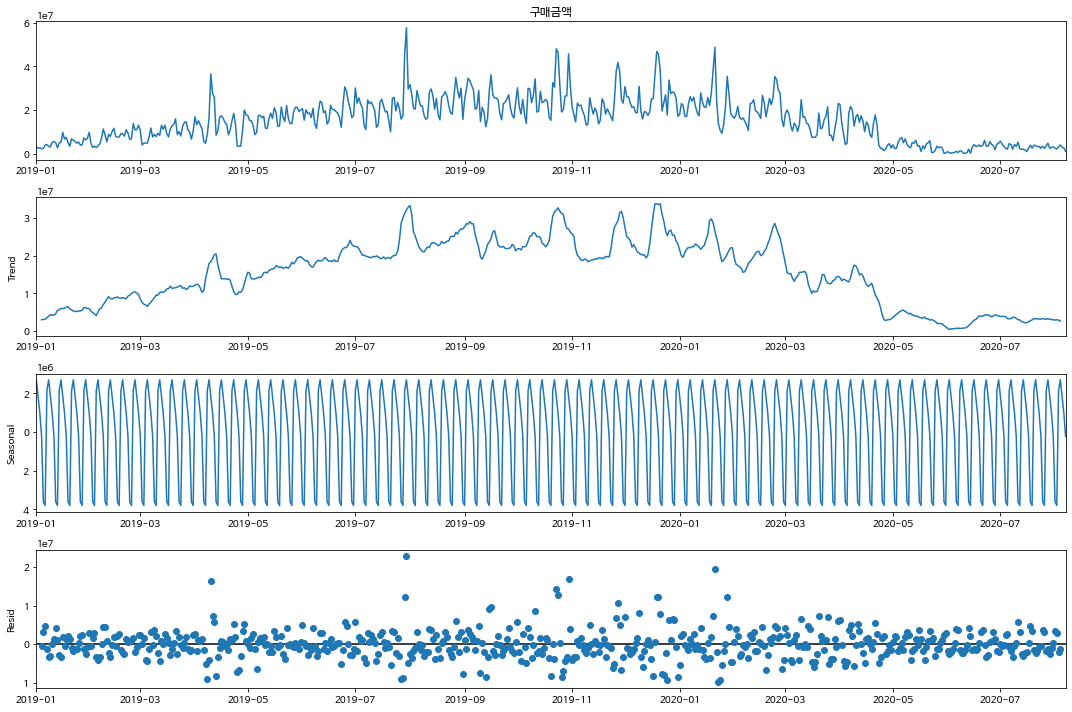

In [116]:
plt.figure(figsize=(10,10))
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [117]:
import itertools

In [118]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [119]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [120]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [121]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [122]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
#ARIMA_list.to_excel('arima_model_list.xlsx')

In [123]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC


In [125]:
mod = tsa.statespace.SARIMAX(y2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

NameError: ignored

- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분 
    - q : q MA PACF 편상관계수 q 값 
    - P 
    - D 
    - Q
    - M 
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정 
    - 귀무 : 데이터가 상관관계를 나타내지 않는다. 
    - 대립 : 데이터가 상관관계를 나타낸다. 
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참  
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정 
    - SARIMAX : 잔차의 분포가 정규분포 인가 
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다. 
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.